In [1]:
from warnings import filterwarnings
import os
import glob
from random import choice
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
from pathlib import Path
import cv2
filterwarnings('ignore')
%matplotlib inline

In [2]:
transformation = transforms.Compose([
    transforms.Resize((100,100)),
    transforms.RandomCrop((90,90)),
    transforms.ToTensor()
])

In [3]:
dataset = datasets.ImageFolder('datasets', transform=transformation)
dataloader = DataLoader(dataset, batch_size=32)

In [4]:
def show_data():
    plt.figure(figsize=(20,20))
    total = 0
    for i in range(1,5):
        dir_name = choice(os.listdir('datasets'))
        file_path = os.path.join(os.getcwd(),'datasets' ,dir_name)
        for n in range(1,5):
            total += 1
            file = choice(os.listdir(file_path))
            image = os.path.join(os.getcwd(), file_path, file)
            ax = plt.subplot(5,5,total)
            ax.imshow(Image.open(image))

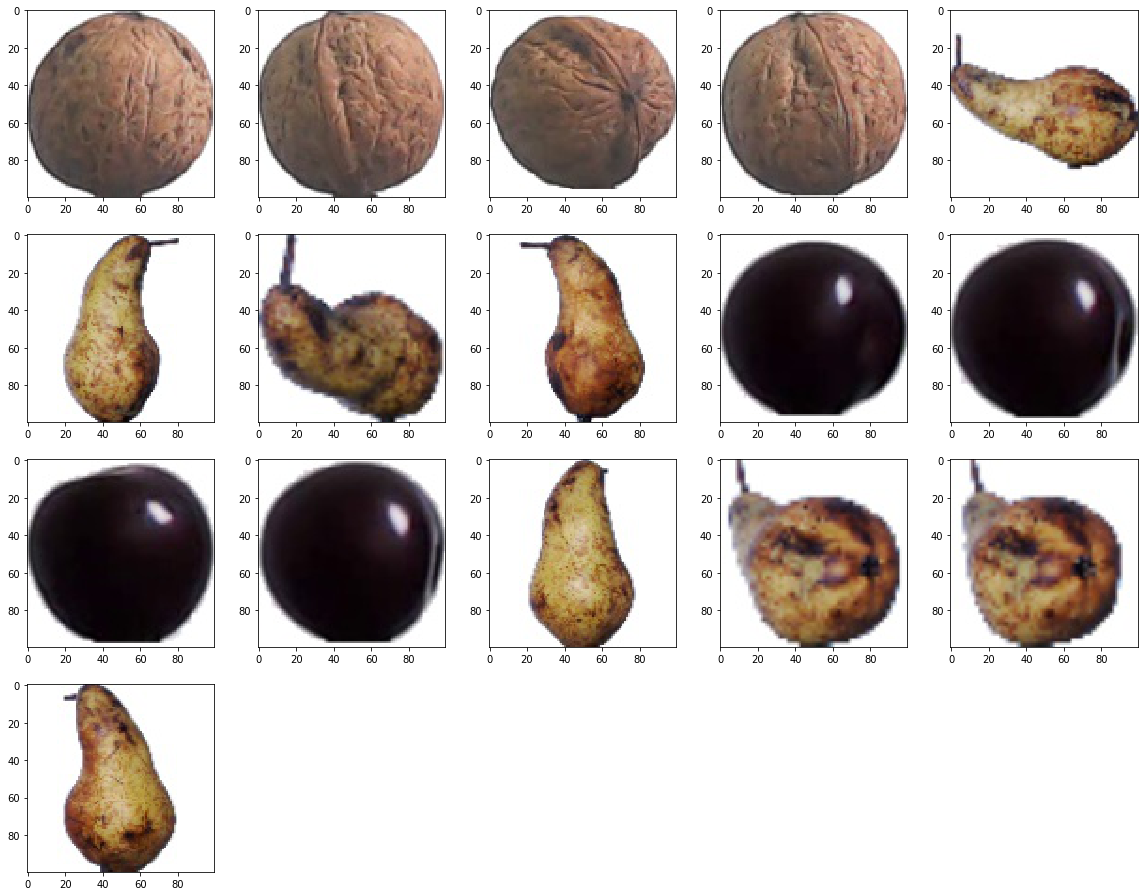

In [5]:
show_data()

In [16]:
class FruitNet(nn.Module):
    def __init__(self):
        super(FruitNet,self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, 3),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(0.3),
            nn.MaxPool2d(2, 2),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, 3),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(0.3),
            nn.MaxPool2d(2, 2),
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, 3),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(0.3),
            nn.MaxPool2d(2, 2),
        )
        self.layer4 = nn.Sequential(
            nn.Linear(5184,1000),
            nn.ReLU()       
        )
        self.layer5 = nn.Sequential(
            nn.Linear(1000,len(dataset.classes)),
            nn.Softmax()       
        )
        
    def forward(self,x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = x.view(x.size(0), -1)
#         print(x.shape)
        x = self.layer4(x)
        x = self.layer5(x)
        return x

In [17]:
net = FruitNet()

In [18]:
import torch.optim as optim
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)
criterion=nn.CrossEntropyLoss()

In [35]:
for epoch in range(1):
    net.train()
    running_loss = 0.0
    for batch, data in enumerate(dataloader):
        image, lable = data
        output = net(image)
        loss = criterion(output, lable)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * image.data.size(0)
    print('Epoch: {}, Avg. Loss: {}'.format(epoch + 1, running_loss/len(dataloader.dataset)))


KeyboardInterrupt: 

In [ ]:
from skimage import io
from skimage.transform import resize

In [ ]:
classes = list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
total = 0
for i in range(1,5):
    dir_name = choice(os.listdir('datasets'))
    file_path = os.path.join(os.getcwd(),'datasets' ,dir_name)
    for n in range(1,5):
        file = choice(os.listdir(file_path))
        image = os.path.join(os.getcwd(), file_path, file)
        temp = io.imread(image)
        temp = resize(temp, (IMG_HEIGHT, IMG_WIDTH))
        try:
            out = classes[np.argmax(model.predict([[temp]]).tolist()[0])]
        except: 
            continue
        total += 1
        ax = plt.subplot(5,5,total)
        ax.set_title(out)
        ax.imshow(temp)
        